In [ ]:
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx')

In [ ]:
df.head(10)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06
5,emptyMacaw4,106419,Belum_menikah,Wanita,Outsource,Software Engineer (Front End),Senior_level,Biasa,Jakarta Selatan,Indeed,...,+6283886053xxx,emptyMacaw4468@yahoo.com,Sarjana,1,0.0,masih_bekerja,1980-05-12,2016-10-02,2020-02-06,-
6,madZebra1,100309,Menikah,Wanita,FullTime,Data Analyst,Freshgraduate_program,Biasa,Jakarta Utara,LinkedIn,...,+6285735701xxx,madZebra1244@icloud.com,Sarjana,1,NaN,masih_bekerja,1979-05-24,2014-11-10,2020-01-02,-
7,cynicalMandrill7,110500,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Senior_level,Kurang,Jakarta Selatan,LinkedIn,...,+6281293511xxx,cynicalMandrill7920@hotmail.com,Magister,1,NaN,masih_bekerja,1983-08-24,2013-07-08,2020-1-14,-
8,lyingMussel8,110533,Bercerai,Pria,FullTime,Software Engineer (Android),Senior_level,Sangat_kurang,Jakarta Selatan,Employee_Referral,...,+6281276485xxx,lyingMussel8944@proton.com,Magister,1,NaN,masih_bekerja,1980-08-26,2016-07-06,2020-2-28,-
9,enviousMoth4,110927,Menikah,Wanita,FullTime,Software Engineer (Android),Freshgraduate_program,Sangat_bagus,Jakarta Pusat,Indeed,...,+6281391211xxx,enviousMoth4516@yahoo.com,Sarjana,1,NaN,masih_bekerja,1984-02-21,2015-3-30,2020-01-03,-


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [ ]:
df.isnull().sum()

,0
Username,0
EnterpriseID,0
StatusPernikahan,0
JenisKelamin,0
StatusKepegawaian,0
Pekerjaan,0
JenjangKarir,0
PerformancePegawai,0
AsalDaerah,0
HiringPlatform,0


In [ ]:
df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'], errors='coerce')
df['TanggalResign'] = pd.to_datetime(df['TanggalResign'], errors='coerce')

<ipython-input-6-53e696ceee87>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TanggalResign'] = pd.to_datetime(df['TanggalResign'], errors='coerce')


In [ ]:
df['PernahBekerja'] = df['PernahBekerja'].replace(['yes'], '1')

In [ ]:
df.drop(['PernahBekerja'], axis = 1, inplace = True)

In [ ]:
df["AlasanResign"].fillna("tidak_diketahui", inplace = True)

<ipython-input-9-f8325fcea410>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["AlasanResign"].fillna("tidak_diketahui", inplace = True)


In [ ]:
df['SkorKepuasanPegawai'].fillna(df['SkorKepuasanPegawai'].median(), inplace=True)
df['JumlahKeikutsertaanProjek'].fillna(df['JumlahKeikutsertaanProjek'].median(), inplace=True)
df['JumlahKeterlambatanSebulanTerakhir'].fillna(df['JumlahKeterlambatanSebulanTerakhir'].median(), inplace=True)
df['JumlahKetidakhadiran'].fillna(df['JumlahKetidakhadiran'].median(), inplace=True)

<ipython-input-10-672c14c72b0a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SkorKepuasanPegawai'].fillna(df['SkorKepuasanPegawai'].median(), inplace=True)
<ipython-input-10-672c14c72b0a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

In [ ]:
df['YearHiring'] = df['TanggalHiring'].dt.year
df['YearResign'] = df['TanggalResign'].dt.year

In [ ]:
df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,Email,TingkatPendidikan,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,YearHiring,YearResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,spiritedPorpoise3135@yahoo.com,Magister,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,NaT,2011,NaN
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,jealousGelding2239@yahoo.com,Sarjana,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-06-16,2014,2018.0
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,pluckyMuesli3961@icloud.com,Magister,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-09-24,2011,2014.0
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,stressedTruffle1406@hotmail.com,Sarjana,0.0,masih_bekerja,1979-11-24,2014-02-17,2020-02-04,NaT,2014,NaN
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,shyTermite7149@gmail.com,Sarjana,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06,2013,2018.0


In [ ]:
hiring_per_tahun = df.groupby('YearHiring').size().reset_index(name='TotalHires')

resigns_per_tahun= df.groupby('YearResign').size().reset_index(name='TotalResigns')

In [ ]:
hiring_per_tahun

,YearHiring,TotalHires
0,2006,1
1,2007,2
2,2008,2
3,2009,7
4,2010,8
5,2011,76
6,2012,41
7,2013,43
8,2014,56
9,2015,31


In [ ]:
resigns_per_tahun

,YearResign,TotalResigns
0,2013.0,5
1,2014.0,12
2,2015.0,8
3,2016.0,8
4,2017.0,19
5,2018.0,26
6,2019.0,5
7,2020.0,6


In [ ]:
hiring_resignation_summary = pd.merge(
    hiring_per_tahun, resigns_per_tahun,
    left_on='YearHiring', right_on='YearResign',
    how='outer'
)
hiring_resignation_summary

,YearHiring,TotalHires,YearResign,TotalResigns
0,2006.0,1.0,NaN,NaN
1,2007.0,2.0,NaN,NaN
2,2008.0,2.0,NaN,NaN
3,2009.0,7.0,NaN,NaN
4,2010.0,8.0,NaN,NaN
5,2011.0,76.0,NaN,NaN
6,2012.0,41.0,NaN,NaN
7,2013.0,43.0,2013.0,5.0
8,2014.0,56.0,2014.0,12.0
9,2015.0,31.0,2015.0,8.0


In [ ]:
hiring_resignation_summary = hiring_resignation_summary.rename(
    columns={'YearHiring': 'Year'}
)

In [ ]:
hiring_resignation_summary['Year'].fillna(hiring_resignation_summary['YearResign'], inplace=True)
hiring_resignation_summary = hiring_resignation_summary.drop(columns=['YearResign'])
hiring_resignation_summary.fillna(0, inplace=True)

<ipython-input-18-c0762cd53479>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hiring_resignation_summary['Year'].fillna(hiring_resignation_summary['YearResign'], inplace=True)


In [ ]:
hiring_resignation_summary

,Year,TotalHires,TotalResigns
0,2006.0,1.0,0.0
1,2007.0,2.0,0.0
2,2008.0,2.0,0.0
3,2009.0,7.0,0.0
4,2010.0,8.0,0.0
5,2011.0,76.0,0.0
6,2012.0,41.0,0.0
7,2013.0,43.0,5.0
8,2014.0,56.0,12.0
9,2015.0,31.0,8.0


In [ ]:
# Calculate cumulative resignations and active employees per year
hiring_resignation_summary['CumulativeHires'] = hiring_resignation_summary['TotalHires'].cumsum()
hiring_resignation_summary['CumulativeResigns'] = hiring_resignation_summary['TotalResigns'].cumsum()

# Calculate active employees by subtracting cumulative resigns from cumulative hires
hiring_resignation_summary['ActiveEmployees'] = hiring_resignation_summary['CumulativeHires'] - hiring_resignation_summary['CumulativeResigns']

# Calculate year-on-year change in active employees
hiring_resignation_summary['ChangeInEmployees'] = hiring_resignation_summary['ActiveEmployees'].diff().fillna(0)

# Displaying the final table to the user
hiring_resignation_summary

,Year,TotalHires,TotalResigns,CumulativeHires,CumulativeResigns,ActiveEmployees,ChangeInEmployees
0,2006.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2007.0,2.0,0.0,3.0,0.0,3.0,2.0
2,2008.0,2.0,0.0,5.0,0.0,5.0,2.0
3,2009.0,7.0,0.0,12.0,0.0,12.0,7.0
4,2010.0,8.0,0.0,20.0,0.0,20.0,8.0
5,2011.0,76.0,0.0,96.0,0.0,96.0,76.0
6,2012.0,41.0,0.0,137.0,0.0,137.0,41.0
7,2013.0,43.0,5.0,180.0,5.0,175.0,38.0
8,2014.0,56.0,12.0,236.0,17.0,219.0,44.0
9,2015.0,31.0,8.0,267.0,25.0,242.0,23.0


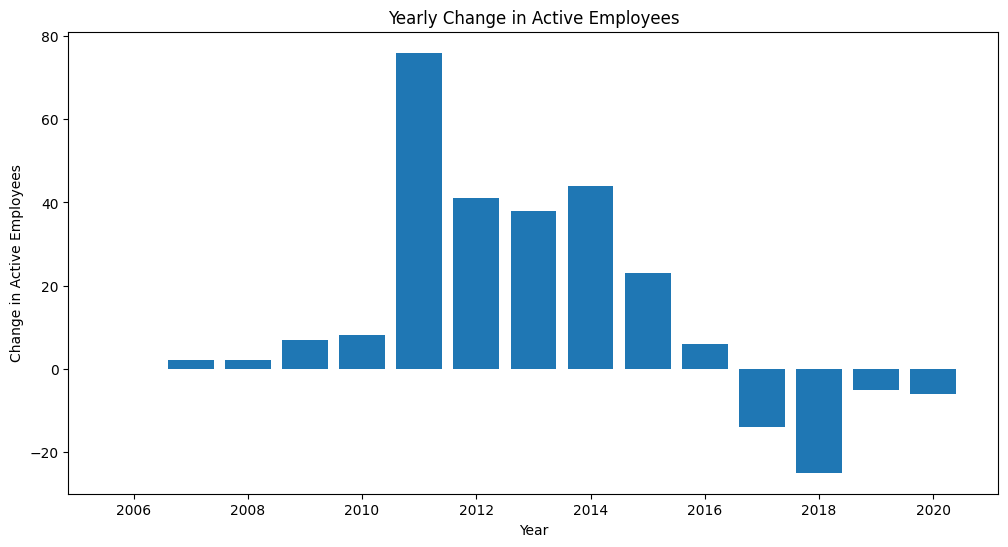

In [ ]:
# Setting up the plot for yearly change in active employees
plt.figure(figsize=(12, 6))

# Plotting the 'ChangeInEmployees' to show yearly increase/decrease in active employees
plt.bar(hiring_resignation_summary['Year'], hiring_resignation_summary['ChangeInEmployees'])

# Adding titles and labels
plt.title("Yearly Change in Active Employees")
plt.xlabel("Year")
plt.ylabel("Change in Active Employees")

# Displaying the plot
plt.show()

In [ ]:
# Filter for employees who have resigned (TanggalResign is not null)
resigned_df = df[df['TanggalResign'].notnull()]

# Filter for employees who have not resigned (TanggalResign is null)
active_df = df[df['TanggalResign'].isnull()]

# Aggregate count of employees by job role for each DataFrame
resigned_by_job = resigned_df.groupby('Pekerjaan').size().reset_index(name='ResignedCount')
active_by_job = active_df.groupby('Pekerjaan').size().reset_index(name='ActiveCount')

In [ ]:
resigned_by_job

,Pekerjaan,ResignedCount
0,Data Analyst,8
1,Data Engineer,3
2,Product Design (UI & UX),9
3,Product Manager,6
4,Software Engineer (Android),7
5,Software Engineer (Back End),28
6,Software Engineer (Front End),28


In [ ]:
active_by_job

,Pekerjaan,ActiveCount
0,Data Analyst,8
1,Data Engineer,7
2,DevOps Engineer,3
3,Digital Product Manager,2
4,Machine Learning Engineer,2
5,Product Design (UI & UX),15
6,Product Design (UX Researcher),1
7,Product Manager,11
8,Scrum Master,3
9,Software Architect,1


In [ ]:
# Performing an outer join on the two tables 'resigned_by_job' and 'active_by_job' on the 'Pekerjaan' key
employee_job_summary = pd.merge(resigned_by_job, active_by_job, on='Pekerjaan', how='outer')

In [ ]:
employee_job_summary

,Pekerjaan,ResignedCount,ActiveCount
0,Data Analyst,8.0,8
1,Data Engineer,3.0,7
2,DevOps Engineer,NaN,3
3,Digital Product Manager,NaN,2
4,Machine Learning Engineer,NaN,2
5,Product Design (UI & UX),9.0,15
6,Product Design (UX Researcher),NaN,1
7,Product Manager,6.0,11
8,Scrum Master,NaN,3
9,Software Architect,NaN,1


In [ ]:
# Filling any NaN values with 0 (to handle any jobs that may not have employees in one of the categories)
employee_job_summary.fillna(0, inplace=True)

In [ ]:
# Adding the 'TotalEmployees' column by summing 'ResignedCount' and 'ActiveCount'
employee_job_summary['TotalEmployees'] = employee_job_summary['ResignedCount'] + employee_job_summary['ActiveCount']

In [ ]:
# Adding the 'ActiveEmployeePercentage' column (percentage of active employees)
employee_job_summary['ActiveEmployeePercentage'] = (employee_job_summary['ActiveCount'] / employee_job_summary['TotalEmployees']) * 100

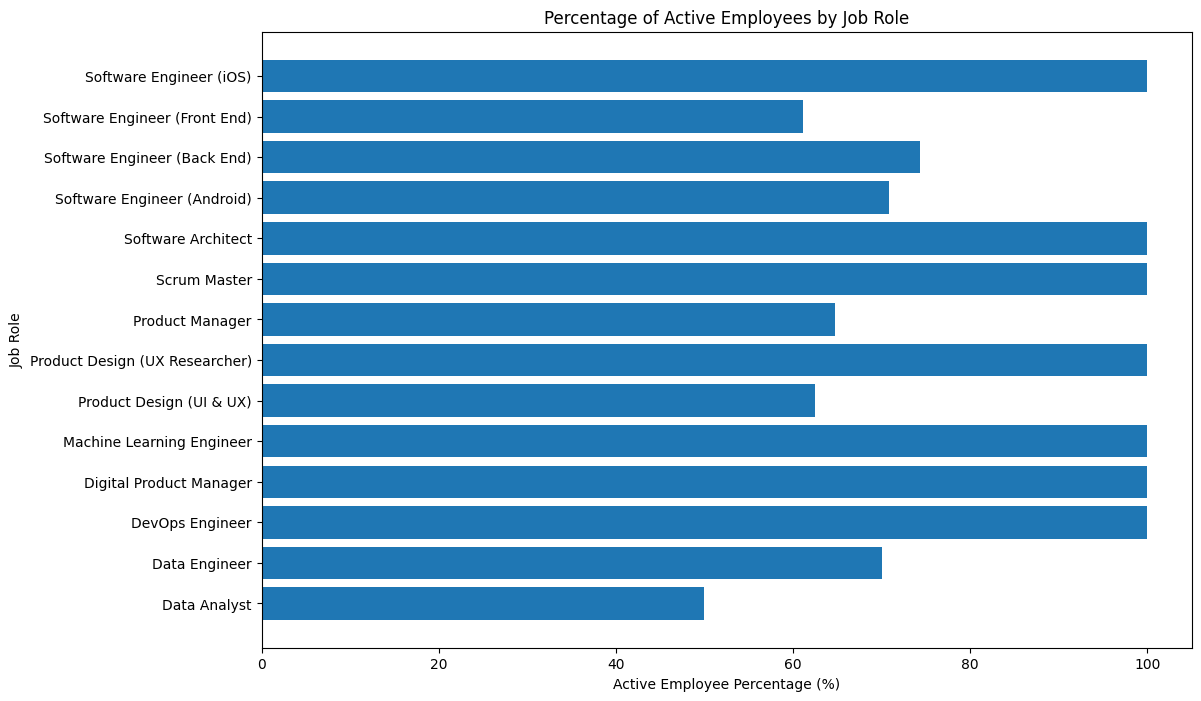

In [ ]:
# Plotting the percentage of active employees by job role
plt.figure(figsize=(12, 8))

# Bar plot for active employee percentage by job role
plt.barh(employee_job_summary['Pekerjaan'], employee_job_summary['ActiveEmployeePercentage'])

# Adding titles and labels
plt.title("Percentage of Active Employees by Job Role")
plt.xlabel("Active Employee Percentage (%)")
plt.ylabel("Job Role")

# Displaying the plot
plt.show()

In [ ]:
# Identifying the division with the highest resignation rate by calculating the resignation percentage for each division

# Calculating resignation percentage for each job role
employee_job_summary['ResignPercentage'] = (
    employee_job_summary['ResignedCount'] / employee_job_summary['TotalEmployees'] * 100
)

# Finding the division with the highest resignation percentage
highest_resign_division = employee_job_summary.loc[employee_job_summary['ResignPercentage'].idxmax()]

highest_resign_division[['Pekerjaan', 'ResignedCount', 'TotalEmployees', 'ResignPercentage']]

,0
Pekerjaan,Data Analyst
ResignedCount,8.0
TotalEmployees,16.0
ResignPercentage,50.0


In [ ]:
# Since 'Data Analyst' has been identified as the division with the highest resignation rate by percentage,
# we will now create an aggregated table to analyze resignation count by Career Level, Performance, and Resignation Reason for this role.

# Filter for 'Data Analyst' resignations
data_analyst_resign_df = resigned_df[resigned_df['Pekerjaan'] == 'Data Analyst']

# Aggregate resignation data by Career Level, Performance, and Resignation Reason
data_analyst_resignation_analysis = data_analyst_resign_df.groupby(
    ['JenjangKarir', 'PerformancePegawai', 'AlasanResign']
).size().reset_index(name='ResignedCount')

# Displaying the aggregated table
data_analyst_resignation_analysis

,JenjangKarir,PerformancePegawai,AlasanResign,ResignedCount
0,Freshgraduate_program,Bagus,toxic_culture,1
1,Freshgraduate_program,Biasa,internal_conflict,1
2,Freshgraduate_program,Biasa,toxic_culture,1
3,Freshgraduate_program,Sangat_bagus,internal_conflict,1
4,Freshgraduate_program,Sangat_bagus,toxic_culture,3
5,Freshgraduate_program,Sangat_kurang,toxic_culture,1


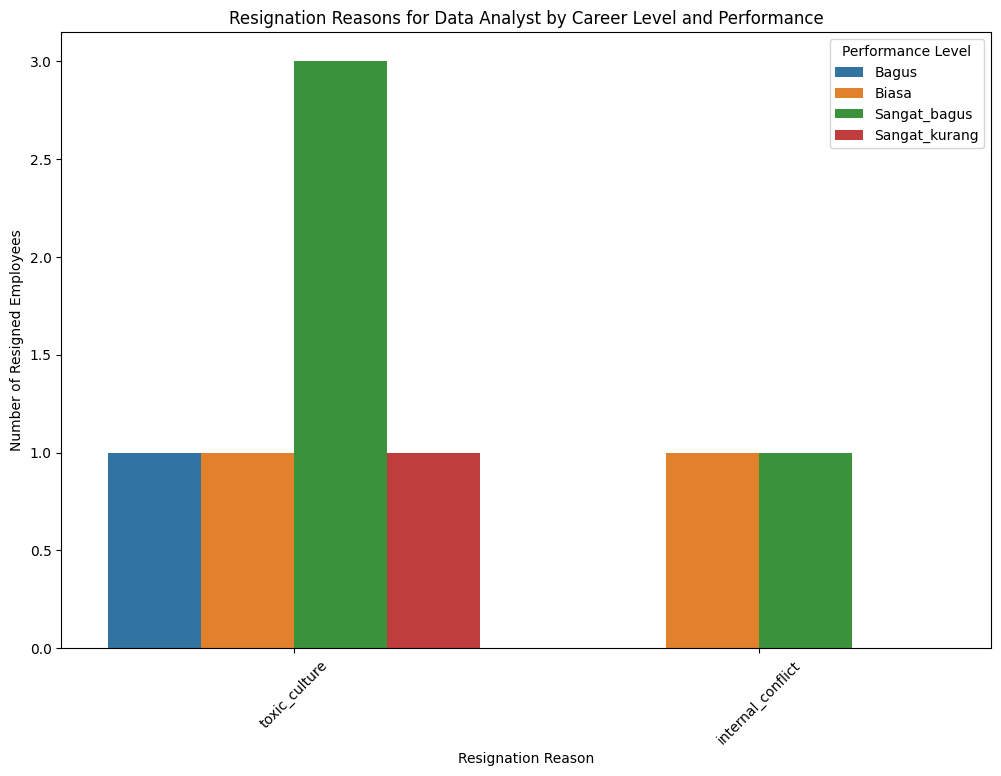

In [ ]:
plt.figure(figsize=(12, 8))

# Bar plot for resignation reasons with career level and performance for the Data Analyst division
sns.barplot(
    data=data_analyst_resignation_analysis,
    x='AlasanResign',
    y='ResignedCount',
    hue='PerformancePegawai'
)

# Adding titles and labels
plt.title("Resignation Reasons for Data Analyst by Career Level and Performance")
plt.xlabel("Resignation Reason")
plt.ylabel("Number of Resigned Employees")

# Rotating x-axis labels for readability
plt.xticks(rotation=45)

# Displaying the plot with legend
plt.legend(title='Performance Level')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
# 1. Encoding Categorical Features
# Define Label Encoding for binary categorical columns
label_enc_columns = ['JenisKelamin', 'StatusKepegawaian']
for col in label_enc_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# One-Hot Encoding for other categorical columns with more categories
one_hot_columns = ['StatusPernikahan', 'Pekerjaan', 'JenjangKarir', 'PerformancePegawai', 'AsalDaerah', 'HiringPlatform', 'TingkatPendidikan']
df = pd.get_dummies(df, columns=one_hot_columns, drop_first=True)

In [ ]:
df

,Username,EnterpriseID,JenisKelamin,StatusKepegawaian,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,...,HiringPlatform_Diversity_Job_Fair,HiringPlatform_Employee_Referral,HiringPlatform_Google_Search,HiringPlatform_Indeed,HiringPlatform_LinkedIn,HiringPlatform_On-line_Web_application,HiringPlatform_Other,HiringPlatform_Website,TingkatPendidikan_Magister,TingkatPendidikan_Sarjana
0,spiritedPorpoise3,111065,0,2,4,4.0,0.0,0.0,9.0,+6282232522xxx,...,False,True,False,False,False,False,False,False,True,False
1,jealousGelding2,106080,0,0,4,4.0,4.0,0.0,3.0,+6281270745xxx,...,False,False,False,False,False,False,False,True,False,True
2,pluckyMuesli3,106452,0,0,4,3.0,0.0,0.0,11.0,+6281346215xxx,...,False,False,False,True,False,False,False,False,True,False
3,stressedTruffle1,106325,0,2,3,3.0,0.0,4.0,6.0,+6283233846xxx,...,False,False,False,False,True,False,False,False,False,True
4,shyTermite7,111171,1,0,3,3.0,0.0,0.0,11.0,+6287883263xxx,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,dopeySheep0,106034,1,0,2,5.0,0.0,0.0,16.0,+6283343465xxx,...,False,False,True,False,False,False,False,False,False,True
283,yearningPorpoise4,106254,1,0,4,5.0,0.0,0.0,11.0,+6281222782xxx,...,False,False,False,False,True,False,False,False,False,True
284,murkySausage9,110433,1,0,2,5.0,0.0,0.0,17.0,+6285821950xxx,...,True,False,False,False,False,False,False,False,False,True
285,truthfulMoth4,110744,0,0,4,5.0,0.0,0.0,20.0,+6287787391xxx,...,False,False,True,False,False,False,False,False,False,True


In [ ]:
# Convert relevant date columns to datetime, with coercion for errors to handle non-datetime values
df['TanggalLahir'] = pd.to_datetime(df['TanggalLahir'], errors='coerce')
df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'], errors='coerce')
df['TanggalPenilaianKaryawan'] = pd.to_datetime(df['TanggalPenilaianKaryawan'], errors='coerce')

# Calculate 'Umur' and 'LamaBekerja' after confirming datetime conversion
current_year = pd.to_datetime("now").year
df['Umur'] = current_year - df['TanggalLahir'].dt.year
df['LamaBekerja'] = (df['TanggalPenilaianKaryawan'] - df['TanggalHiring']).dt.days / 365  # Convert days to years

# Verify the new columns to ensure calculations are correct
df[['Umur', 'LamaBekerja']].head()

,Umur,LamaBekerja
0,52,5.101370
1,40,6.032877
2,50,5.002740
3,45,5.967123
4,50,6.200000


In [ ]:
# Aggregate Features
df['TotalAbsensi'] = df['JumlahKeterlambatanSebulanTerakhir'].fillna(0) + df['JumlahKetidakhadiran'].fillna(0)
df['TotalEngagementScore'] = df['SkorSurveyEngagement'] + df['SkorKepuasanPegawai'].fillna(df['SkorKepuasanPegawai'].mean())

In [ ]:
# Binarize 'IkutProgramLOP' feature (1 if joined, 0 otherwise)
df['IkutProgramLOP'] = df['IkutProgramLOP'].fillna(0).apply(lambda x: 1 if x > 0 else 0)

In [ ]:
# Feature Selection - Drop Unnecessary Columns
drop_columns = [
    'Username', 'EnterpriseID', 'NomorHP', 'Email', 'TanggalLahir',
    'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign'
]
df = df.drop(columns=drop_columns)

In [ ]:
df

,JenisKelamin,StatusKepegawaian,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,IkutProgramLOP,AlasanResign,YearHiring,...,HiringPlatform_LinkedIn,HiringPlatform_On-line_Web_application,HiringPlatform_Other,HiringPlatform_Website,TingkatPendidikan_Magister,TingkatPendidikan_Sarjana,Umur,LamaBekerja,TotalAbsensi,TotalEngagementScore
0,0,2,4,4.0,0.0,0.0,9.0,1,masih_bekerja,2011,...,False,False,False,False,True,False,52,5.101370,9.0,8.0
1,0,0,4,4.0,4.0,0.0,3.0,1,toxic_culture,2014,...,False,False,False,True,False,True,40,6.032877,3.0,8.0
2,0,0,4,3.0,0.0,0.0,11.0,1,jam_kerja,2011,...,False,False,False,False,True,False,50,5.002740,11.0,7.0
3,0,2,3,3.0,0.0,4.0,6.0,0,masih_bekerja,2014,...,True,False,False,False,False,True,45,5.967123,10.0,6.0
4,1,0,3,3.0,0.0,0.0,11.0,0,ganti_karir,2013,...,True,False,False,False,False,True,50,6.200000,11.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,1,0,2,5.0,0.0,0.0,16.0,0,tidak_diketahui,2011,...,False,False,False,False,False,True,51,4.432877,16.0,7.0
283,1,0,4,5.0,0.0,0.0,11.0,0,jam_kerja,2013,...,True,False,False,False,False,True,50,6.715068,11.0,9.0
284,1,0,2,5.0,0.0,0.0,17.0,1,ganti_karir,2013,...,False,False,False,False,False,True,55,6.197260,17.0,7.0
285,0,0,4,5.0,0.0,0.0,20.0,0,kejelasan_karir,2011,...,False,False,False,False,False,True,43,2.890411,20.0,9.0


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Applying Random Over-sampling to balance the data
ros = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)

# Checking the distribution of classes in the balanced training set
y_train_balanced.value_counts()

,count
AlasanResign,
tidak_bahagia,105
ganti_karir,105
masih_bekerja,105
tidak_diketahui,105
Product Design (UI & UX),105
toxic_culture,105
tidak_bisa_remote,105
jam_kerja,105
leadership,105


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Define features and target
X = df.drop(columns=['AlasanResign'])
y = df['AlasanResign']

# Split data with stratification to maintain class distribution in both training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Combine X_train and y_train for resampling
train_data = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)

# Separate majority and minority classes based on class distribution
majority_class = train_data['AlasanResign'].mode()[0]  # Most frequent class
minority_data = train_data[train_data['AlasanResign'] != majority_class]
majority_data = train_data[train_data['AlasanResign'] == majority_class]

# Apply oversampling to minority classes to balance the dataset
minority_oversampled = resample(minority_data, replace=True, n_samples=len(majority_data), random_state=42)
train_data_balanced = pd.concat([majority_data, minority_oversampled])

# Separate features and target from the balanced training data
X_train_balanced = train_data_balanced.drop(columns='AlasanResign')
y_train_balanced = train_data_balanced['AlasanResign']

# Verify the class distribution after balancing
y_train_balanced.value_counts()

,count
AlasanResign,
masih_bekerja,105
tidak_diketahui,30
jam_kerja,12
ganti_karir,9
tidak_bahagia,7
leadership,7
kejelasan_karir,4
tidak_bisa_remote,3
toxic_culture,3


In [ ]:
from sklearn.impute import SimpleImputer

# Imputer to replace NaN values with the mean for numerical columns
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on X_train_balanced and X_test
X_train_balanced_imputed = imputer.fit_transform(X_train_balanced)
X_test_imputed = imputer.transform(X_test)

# Verify if there are any NaN values left after imputing
import numpy as np
np.isnan(X_train_balanced_imputed).sum(), np.isnan(X_test_imputed).sum()

(0, 0)

In [ ]:
# Remove rows with NaN in y_train_balanced and corresponding rows in X_train_balanced_imputed
# Find non-NaN indices
non_nan_indices = ~y_train_balanced.isna()  # Remove NaNs if any remain in target
y_train_balanced_clean = y_train_balanced[non_nan_indices]
X_train_balanced_imputed_clean = X_train_balanced_imputed[non_nan_indices]

# Confirm that both X_train_balanced_imputed and y_train_balanced have the same length now
X_train_balanced_imputed_clean.shape, y_train_balanced_clean.shape

((1260, 51), (1260,))

In [ ]:
# Re-train models and calculate metrics without AUC-ROC for incompatible models
results = {}

# Train each model and evaluate
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_balanced_imputed_clean, y_train_balanced_clean)

    # Predict on test set
    y_pred = model.predict(X_test_imputed)

    # Calculate metrics without AUC-ROC to avoid compatibility issues
    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    f1_score = classification_rep['weighted avg']['f1-score']
    precision = classification_rep['weighted avg']['precision']
    recall = classification_rep['weighted avg']['recall']

    # Store results
    results[model_name] = {
        "F1-Score": f1_score,
        "Precision": precision,
        "Recall": recall
    }

# Convert results to DataFrame for display
results_df = pd.DataFrame(results).T
results_df

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. 

,F1-Score,Precision,Recall
Logistic Regression,0.149645,0.239390,0.120690
Decision Tree,0.380137,0.381915,0.379310
Random Forest,0.257260,0.199507,0.362069
SVM,0.061576,0.250000,0.051724
Gradient Boosting,0.462919,0.450634,0.482759
K-Nearest Neighbors,0.257759,0.318590,0.241379


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Set up a pipeline for imputing and model fitting
pipeline = Pipeline([
    ('model', DecisionTreeClassifier(random_state=42))
])

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__criterion': ['gini', 'entropy']
}

# GridSearchCV with 5-fold cross-validation for more reliable results
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

# Fit the grid search on the balanced training data
grid_search.fit(X_train_balanced_imputed_clean, y_train_balanced_clean)

# Retrieve the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

({'model__criterion': 'entropy',
  'model__max_depth': None,
  'model__min_samples_leaf': 1,
  'model__min_samples_split': 5},
 0.9577474126865205)

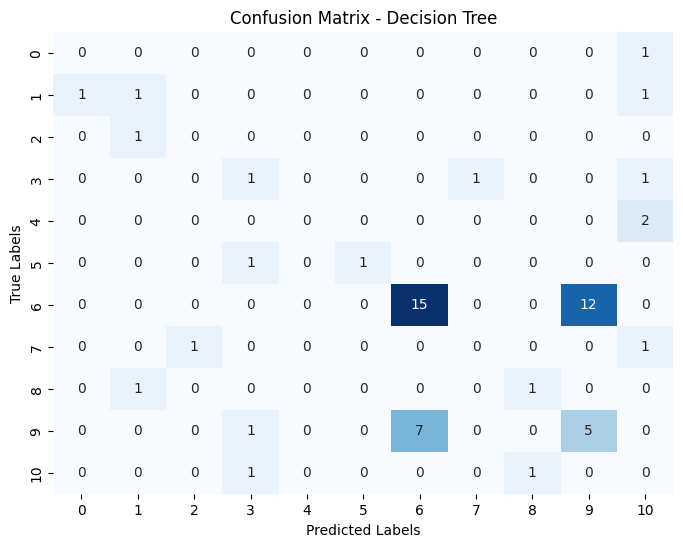

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Define and train the Decision Tree model
best_tree_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2, criterion='gini', random_state=42)
best_tree_model.fit(X_train_balanced_imputed_clean, y_train_balanced_clean)

# Predict on test set
y_pred_tree = best_tree_model.predict(X_test_imputed)

# 1. Confusion Matrix
cm_tree = confusion_matrix(y_test, y_pred_tree)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

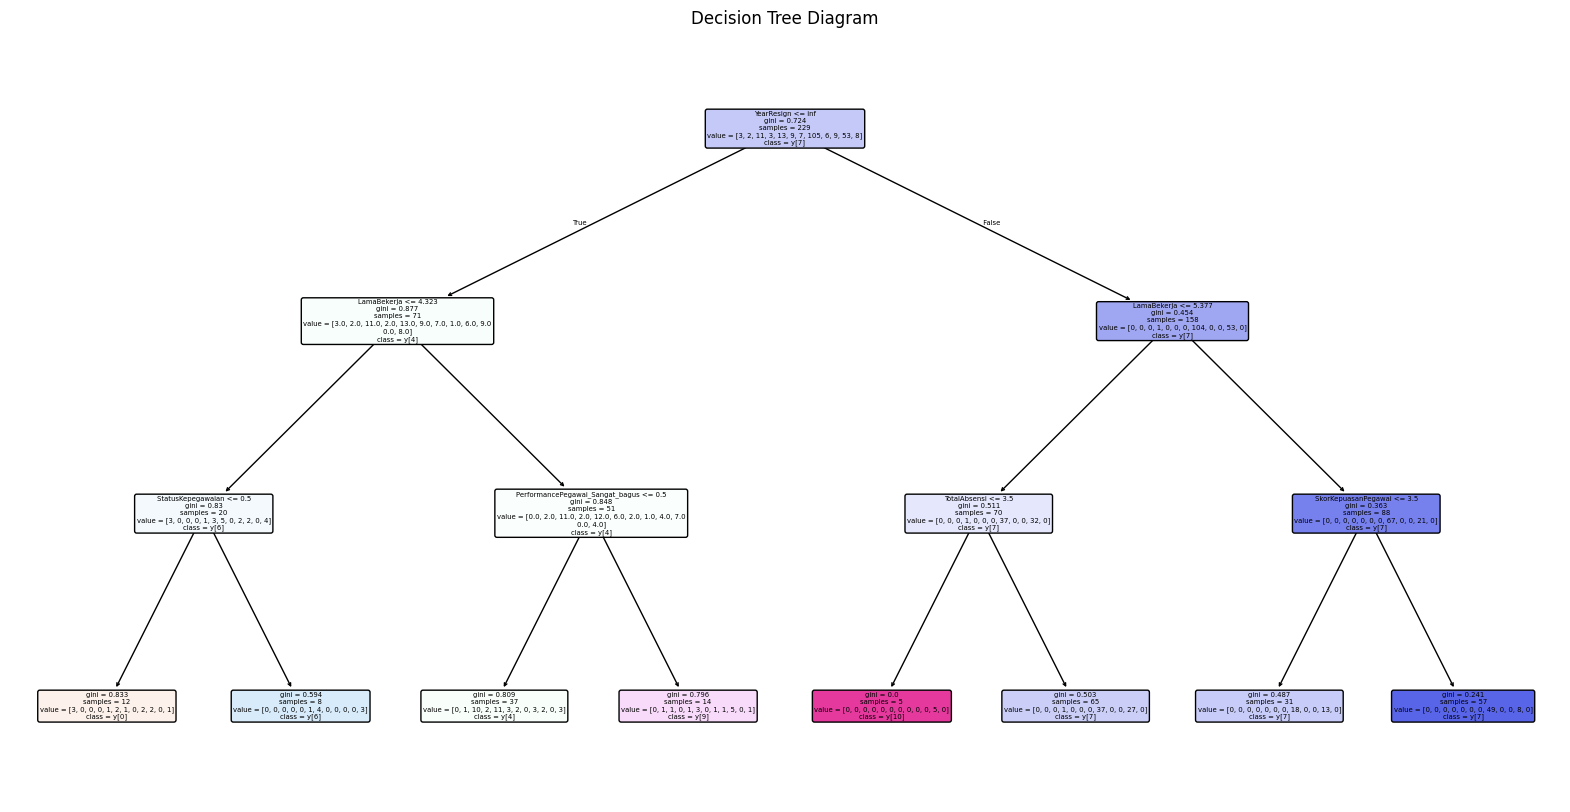

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Inisialisasi model Decision Tree
model = DecisionTreeClassifier(max_depth=3)  # Set max_depth untuk mencegah pohon terlalu dalam
model.fit(X_train, y_train)  # Gantilah X_train dan y_train dengan data kamu

# Visualisasi pohon
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X_train.columns, class_names=True, rounded=True)
plt.title("Decision Tree Diagram")
plt.show()

In [ ]:
import pandas as pd

# Mendapatkan feature importance
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Menampilkan tabel fitur dengan pengaruh terbesar
print(feature_importances)

                                     Feature  Importance
9                                 YearResign    0.656632
48                               LamaBekerja    0.132223
3                        SkorKepuasanPegawai    0.064494
49                              TotalAbsensi    0.063797
31           PerformancePegawai_Sangat_bagus    0.044688
1                          StatusKepegawaian    0.038167
0                               JenisKelamin    0.000000
37         HiringPlatform_Diversity_Job_Fair    0.000000
29                  PerformancePegawai_Biasa    0.000000
30                 PerformancePegawai_Kurang    0.000000
32          PerformancePegawai_Sangat_kurang    0.000000
33                  AsalDaerah_Jakarta Pusat    0.000000
34                AsalDaerah_Jakarta Selatan    0.000000
35                  AsalDaerah_Jakarta Timur    0.000000
36                  AsalDaerah_Jakarta Utara    0.000000
40                     HiringPlatform_Indeed    0.000000
38          HiringPlatform_Empl

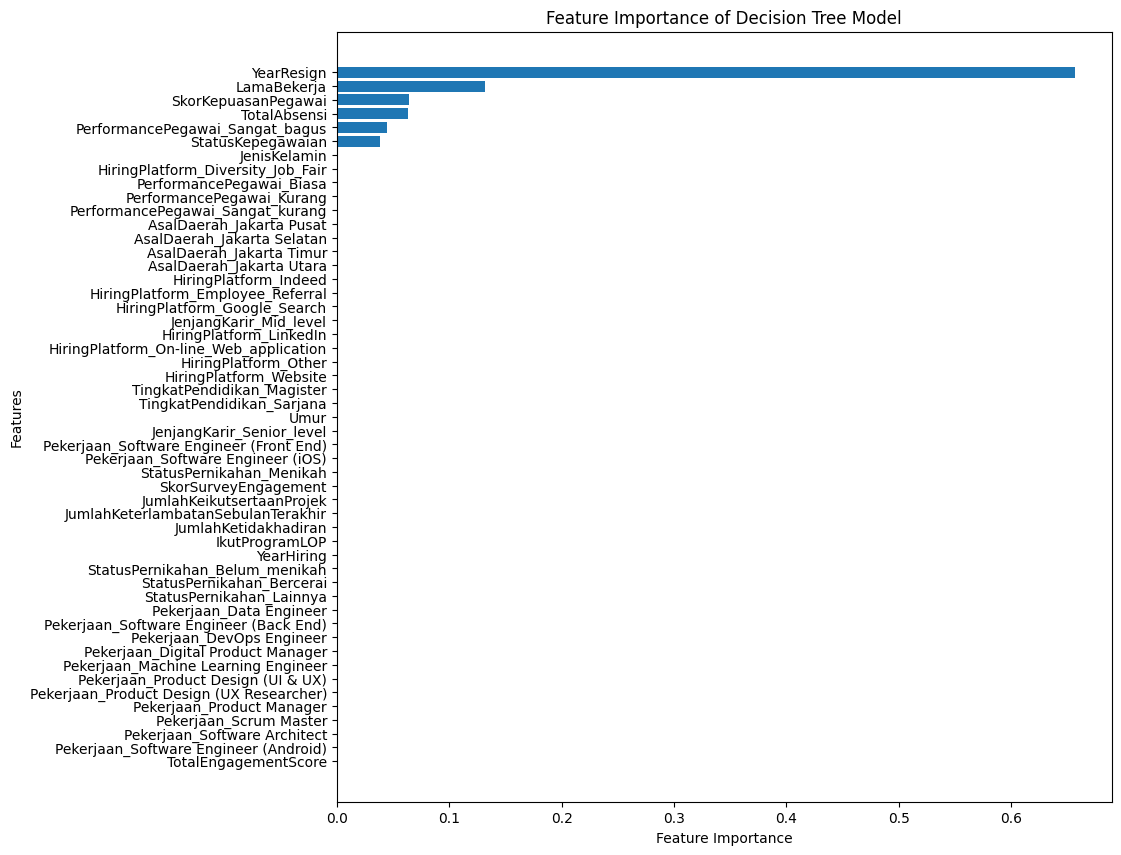

In [ ]:
plt.figure(figsize=(10, 10))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance of Decision Tree Model")
plt.gca().invert_yaxis()  # Membalik sumbu untuk menampilkan fitur terpenting di atas
plt.show()